In [37]:
import numpy as np
import matplotlib.pyplot as plt


def f(theta, thetaVelocity, g, L):
    dthetha_dt = thetaVelocity
    dthethaVelocity_dt = (((2 * g * L ** -1) - thetaVelocity * np.cos(theta)) * np.sin(theta)) / (1 / 3) + (np.sin(theta)) ** 2
    return [dthetha_dt, dthethaVelocity_dt]

h = 0.001
t = np.arange(0, 0.31, h)
theta0 = (10 * np.pi / 180) * 1.0
thetaVelocity0 = 0
L = 1
g = 9.81

def Integrator2(f, theta0, thetaVelocity0, t, g, L):
    h = t[1] - t[0]
    theta = np.zeros_like(t)
    thetaVelocity = np.zeros_like(t)
    theta[0] = theta0
    thetaVelocity[0] = thetaVelocity0
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    for i in range(1, len(t)):
        R = np.array([theta[i - 1], thetaVelocity[i - 1]])
        K1 = f(R[0], R[1], g, L)
        R = np.array([theta[i - 1] + h * K1[0], thetaVelocity[i - 1] + h * K1[1]])
        K2 = f(R[0], R[1], g, L)
        theta[i] = theta[i - 1] + 0.5 * h * (K1[0] + K2[0])
        thetaVelocity[i] = thetaVelocity[i - 1] + 0.5 * h * (K1[1] + K2[1])
    return theta, thetaVelocity

theta, thetaVelocity = Integrator2(f, theta0, thetaVelocity0, t, g, L)

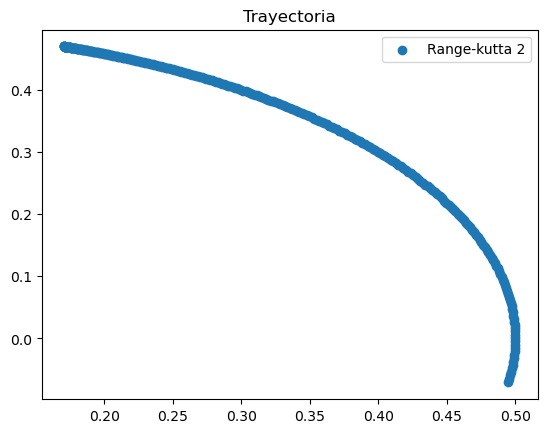

In [45]:
plt.scatter(L/2*np.sin(theta*2),L/2*np.cos(theta*2),label="Range-kutta 2")
plt.title(label="Trayectoria")
plt.legend()
plt.show()

In [57]:
t_ = 0
for i in range(len(t)):
    if theta[i] > np.pi/4:
        t_ = i
        break

In [62]:
t[t_]

0.297